In [86]:
import pandas as pd 
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

# Time Series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from datetime import datetime, timedelta
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

# For printing multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Visualization parameters
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [87]:
velachery_daily_aqi = pd.read_csv("../data/AQIData/velachery_daily_aqi.csv")

In [88]:
# Assuming velachery_daily_aqi is your original DataFrame
# First, set the index to the 'Timestamp' column
velachery_daily_aqi_indexed = velachery_daily_aqi.set_index('Timestamp')

# Make sure the index is datetime
velachery_daily_aqi_indexed.index = pd.to_datetime(velachery_daily_aqi_indexed.index)

# Now, keep only the 'AQI' column
velachery_daily_aqi_filtered = velachery_daily_aqi_indexed[['AQI']]

# Now you can split the data
train_data = velachery_daily_aqi_filtered.loc[:'2023-11-23']
test_data = velachery_daily_aqi_filtered.loc['2023-11-24':'2023-12-01']


In [89]:
train_data

,AQI
Timestamp,
2021-01-01,66.668056
2021-01-02,63.033521
2021-01-03,55.588368
2021-01-04,84.455437
2021-01-05,76.759860
...,...
2023-11-19,75.521453
2023-11-20,103.413753
2023-11-21,128.214857


In [90]:
test_data

,AQI
Timestamp,
2023-11-24,78.478428
2023-11-25,81.507082
2023-11-26,74.524353
2023-11-27,94.927039
2023-11-28,69.124752
2023-11-29,121.642585
2023-11-30,89.776032
2023-12-01,138.272673


In [91]:
import pandas as pd
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA

# Assuming velachery_daily_aqi_filtered is already defined and contains only 'AQI' with 'Timestamp' as index
train_end = pd.Timestamp('2023-11-23')
test_end = pd.Timestamp('2023-12-01')

# Ensure you are using the filtered DataFrame with only 'AQI'
train_data = velachery_daily_aqi_filtered[:train_end]['AQI']
test_data = velachery_daily_aqi_filtered[train_end + pd.Timedelta(days=1):test_end]['AQI']

my_order = (1, 0, 1)
rolling_predictions = test_data.copy()

# Loop through the test data index for rolling predictions
for current_test_date in test_data.index:
    print("Current test date:", current_test_date)
    
    # Create the training data up to the day before the current test day
    train_data = velachery_daily_aqi_filtered[:current_test_date - pd.Timedelta(days=1)]['AQI']
    
    # Fit the ARIMA model
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    
    # Forecast the next value
    pred = model_fit.forecast(steps=1)  # Forecasting one step ahead
    print("Predicted value:", pred[0])
    
    # Store the prediction in the rolling_predictions Series
    rolling_predictions[current_test_date] = pred[0]  # Store the predicted value

# Display the rolling predictions
print("\nRolling Predictions:")
print(rolling_predictions)

Current test date: 2023-11-24 00:00:00
Predicted value: 111.12613360288728
Current test date: 2023-11-25 00:00:00


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/3430615856.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Predicted value:", pred[0])
/tmp/ipykernel_16611/3430615856.py:32: Futur

Predicted value: 82.61097862511505
Current test date: 2023-11-26 00:00:00
Predicted value: 81.17474093658932
Current test date: 2023-11-27 00:00:00


/tmp/ipykernel_16611/3430615856.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Predicted value:", pred[0])
/tmp/ipykernel_16611/3430615856.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rolling_predictions[current_test_date] = pred[0]  # Store the predicted value
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency infor

Predicted value: 76.97613433646521
Current test date: 2023-11-28 00:00:00
Predicted value: 88.30266313934362
Current test date: 2023-11-29 00:00:00


/tmp/ipykernel_16611/3430615856.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Predicted value:", pred[0])
/tmp/ipykernel_16611/3430615856.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rolling_predictions[current_test_date] = pred[0]  # Store the predicted value
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency infor

Predicted value: 74.66985081959285
Current test date: 2023-11-30 00:00:00
Predicted value: 103.3884212824934
Current test date: 2023-12-01 00:00:00
Predicted value: 88.39311706548193

Rolling Predictions:
Timestamp
2023-11-24    111.126134
2023-11-25     82.610979
2023-11-26     81.174741
2023-11-27     76.976134
2023-11-28     88.302663
2023-11-29     74.669851
2023-11-30    103.388421
2023-12-01     88.393117
Name: AQI, dtype: float64


/tmp/ipykernel_16611/3430615856.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Predicted value:", pred[0])
/tmp/ipykernel_16611/3430615856.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rolling_predictions[current_test_date] = pred[0]  # Store the predicted value


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 101')

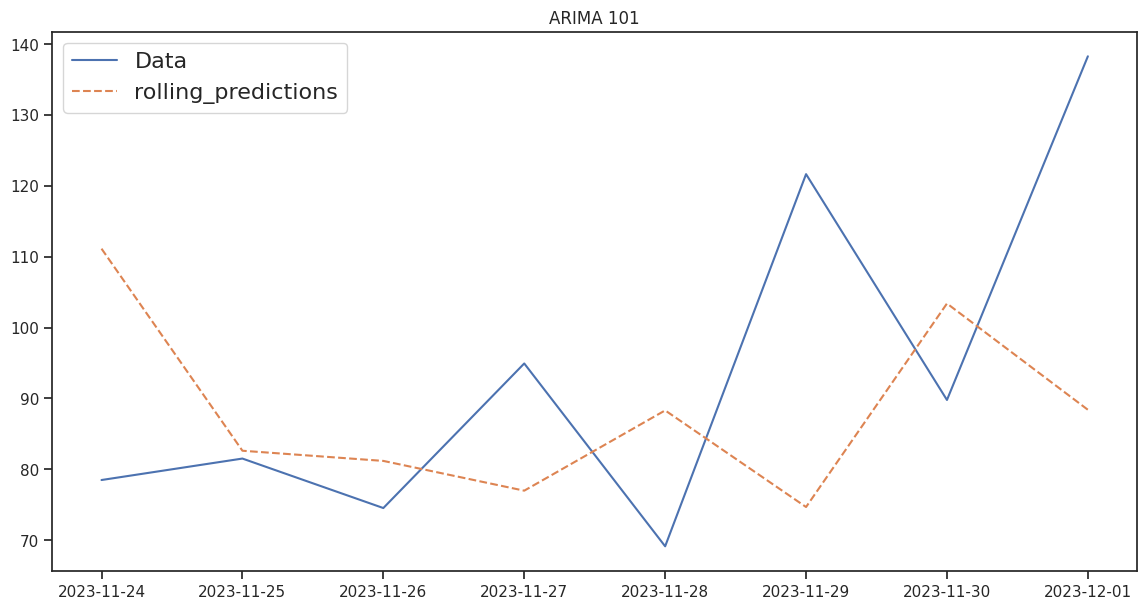

In [92]:
p, d, q = 1, 0, 1 
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Shifted -1 predictions ARIMA 101')

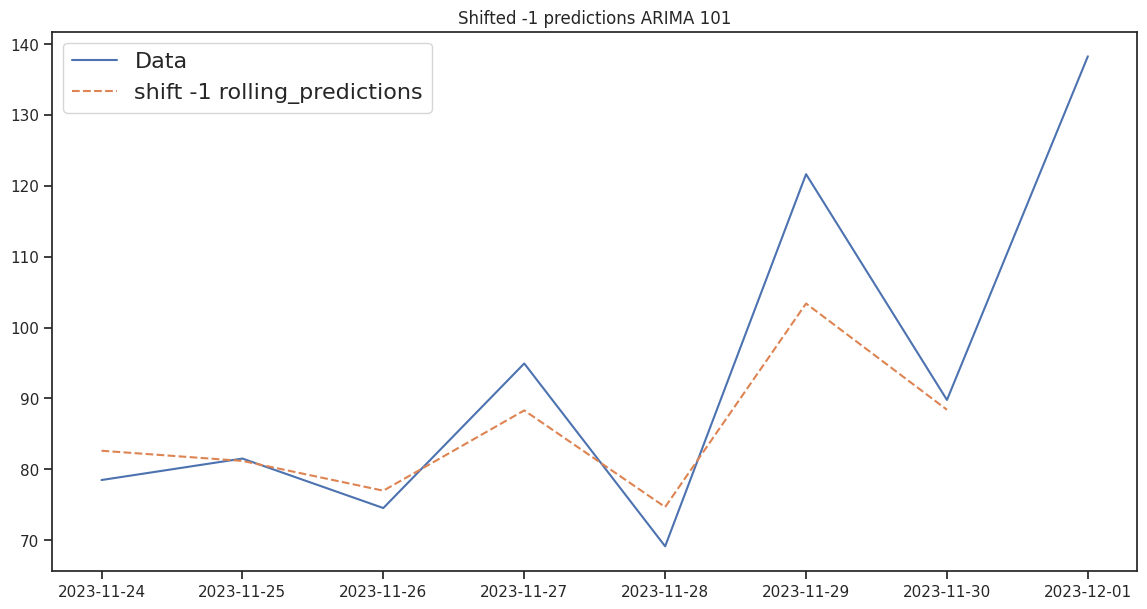

In [93]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'shift -1 rolling_predictions'), fontsize=16)
plt.title("Shifted -1 predictions ARIMA " + str(p) + str(d) + str(q))

In [94]:
train_end = datetime(2023, 10, 23)
test_end = datetime(2023, 11, 22)

train_data = velachery_daily_aqi_filtered[:train_end]['AQI']
test_data = velachery_daily_aqi_filtered[train_end + timedelta(days=1):test_end]['AQI']

my_order = (1, 0, 0)
p, d, q = my_order
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = velachery_daily_aqi_filtered[:train_end - timedelta(days=1)]['AQI']
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    print("pred", pred)
    rolling_predictions[train_end] = pred

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information

pred 2023-10-24    95.428552
Freq: D, dtype: float64
pred 2023-10-25    92.344315
Freq: D, dtype: float64
pred 2023-10-26    100.309412
Freq: D, dtype: float64
pred 2023-10-27    90.417942
Freq: D, dtype: float64


/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-10-28    87.066853
Freq: D, dtype: float64
pred 2023-10-29    89.59784
Freq: D, dtype: float64
pred 2023-10-30    77.630833
Freq: D, dtype: float64


/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-10-31    129.005763
Freq: D, dtype: float64
pred 2023-11-01    105.325834
Freq: D, dtype: float64
pred 2023-11-02    108.479282
Freq: D, dtype: float64
pred 2023-11-03    93.707464
Freq: D, dtype: float64


/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-04    119.89317
Freq: D, dtype: float64
pred 2023-11-05    119.519561
Freq: D, dtype: float64
pred 2023-11-06    72.863098
Freq: D, dtype: float64
pred 2023-11-07    71.478406
Freq: D, dtype: float64


/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-08    81.279724
Freq: D, dtype: float64
pred 2023-11-09    92.243166
Freq: D, dtype: float64
pred 2023-11-10    114.675229
Freq: D, dtype: float64
pred 2023-11-11    113.552517
Freq: D, dtype: float64


/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-12    98.676705
Freq: D, dtype: float64
pred 2023-11-13    212.799841
Freq: D, dtype: float64


/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-14    183.949496
Freq: D, dtype: float64
pred 2023-11-15    114.295
Freq: D, dtype: float64
pred 2023-11-16    98.576262
Freq: D, dtype: float64
pred 2023-11-17    108.358733
Freq: D, dtype: float64


/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

pred 2023-11-18    86.33767
Freq: D, dtype: float64
pred 2023-11-19    77.108599
Freq: D, dtype: float64
pred 2023-11-20    77.165617
Freq: D, dtype: float64
pred 2023-11-21    94.533182
Freq: D, dtype: float64
pred 2023-11-22    110.007394
Freq: D, dtype: float64


/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/967419316.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeEr

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 100')

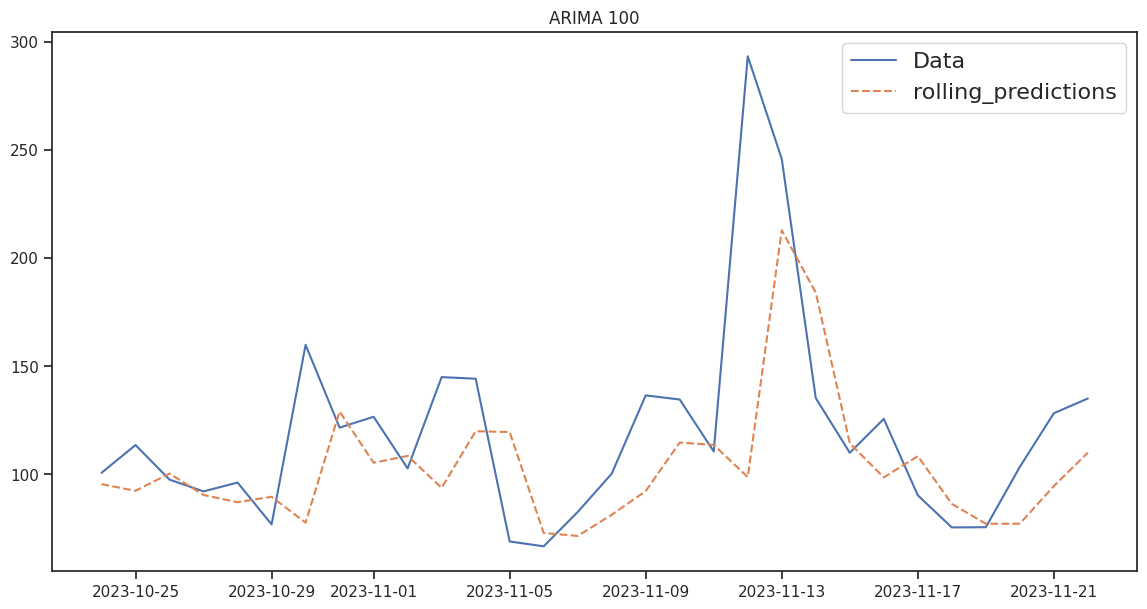

In [95]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Shifted -1 predictions ARIMA 100')

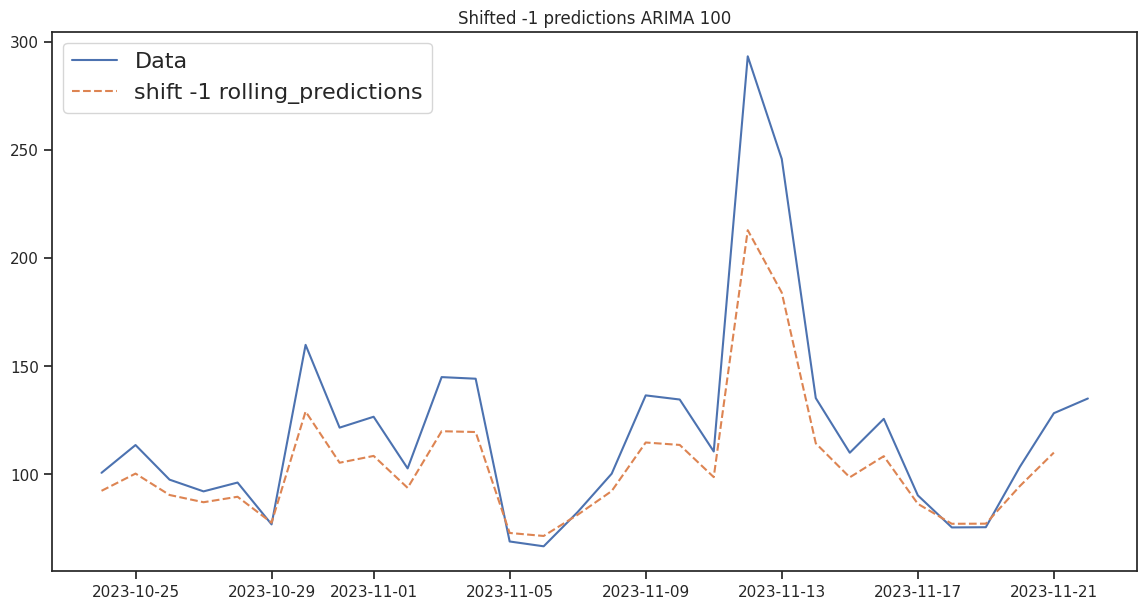

In [96]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'shift -1 rolling_predictions'), fontsize=16)
plt.title("Shifted -1 predictions ARIMA " + str(p) + str(d) + str(q))

In [97]:
train_end = datetime(2023, 10, 23)
test_end = datetime(2023, 11, 22)

train_data = velachery_daily_aqi_filtered[:train_end]['AQI']
test_data = velachery_daily_aqi_filtered[train_end + timedelta(days=1):test_end]['AQI']

my_order = (0, 0, 1)
p, d, q = my_order
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = velachery_daily_aqi_filtered[:train_end - timedelta(days=1)]['AQI']
    model = ARIMA(train_data, order=my_order)
    model_fit = model.fit()
    pred = model_fit.forecast()
    print("pred", pred)
    rolling_predictions[train_end] = pred

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency informatio

pred 2023-10-24    93.415925
Freq: D, dtype: float64
pred 2023-10-25    83.013323
Freq: D, dtype: float64
pred 2023-10-26    96.405584
Freq: D, dtype: float64


/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a Type

pred 2023-10-27    79.534753
Freq: D, dtype: float64
pred 2023-10-28    86.127807
Freq: D, dtype: float64
pred 2023-10-29    84.698434
Freq: D, dtype: float64


/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a Type

pred 2023-10-30    74.408525
Freq: D, dtype: float64
pred 2023-10-31    128.064258
Freq: D, dtype: float64
pred 2023-11-01    75.310497
Freq: D, dtype: float64


/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a Type

pred 2023-11-02    108.41687
Freq: D, dtype: float64
pred 2023-11-03    75.849486
Freq: D, dtype: float64
pred 2023-11-04    118.54959
Freq: D, dtype: float64


/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a Type

pred 2023-11-05    93.818957
Freq: D, dtype: float64
pred 2023-11-06    64.994697
Freq: D, dtype: float64
pred 2023-11-07    80.203956
Freq: D, dtype: float64


/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a Type

pred 2023-11-08    80.568078
Freq: D, dtype: float64
pred 2023-11-09    90.520235
Freq: D, dtype: float64
pred 2023-11-10    105.605392
Freq: D, dtype: float64


/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a Type

pred 2023-11-11    95.930184
Freq: D, dtype: float64
pred 2023-11-12    87.747981
Freq: D, dtype: float64
pred 2023-11-13    197.535845
Freq: D, dtype: float64


/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a Type

pred 2023-11-14    107.098201
Freq: D, dtype: float64
pred 2023-11-15    95.99408
Freq: D, dtype: float64
pred 2023-11-16    87.874261
Freq: D, dtype: float64


/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a Type

pred 2023-11-17    101.6568
Freq: D, dtype: float64
pred 2023-11-18    73.301659
Freq: D, dtype: float64
pred 2023-11-19    81.10835
Freq: D, dtype: float64


/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a Type

pred 2023-11-20    76.651738
Freq: D, dtype: float64
pred 2023-11-21    95.338531
Freq: D, dtype: float64
pred 2023-11-22    98.915979
Freq: D, dtype: float64


/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rolling_predictions[train_end] = pred
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_16611/3365060276.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a Type

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 001')

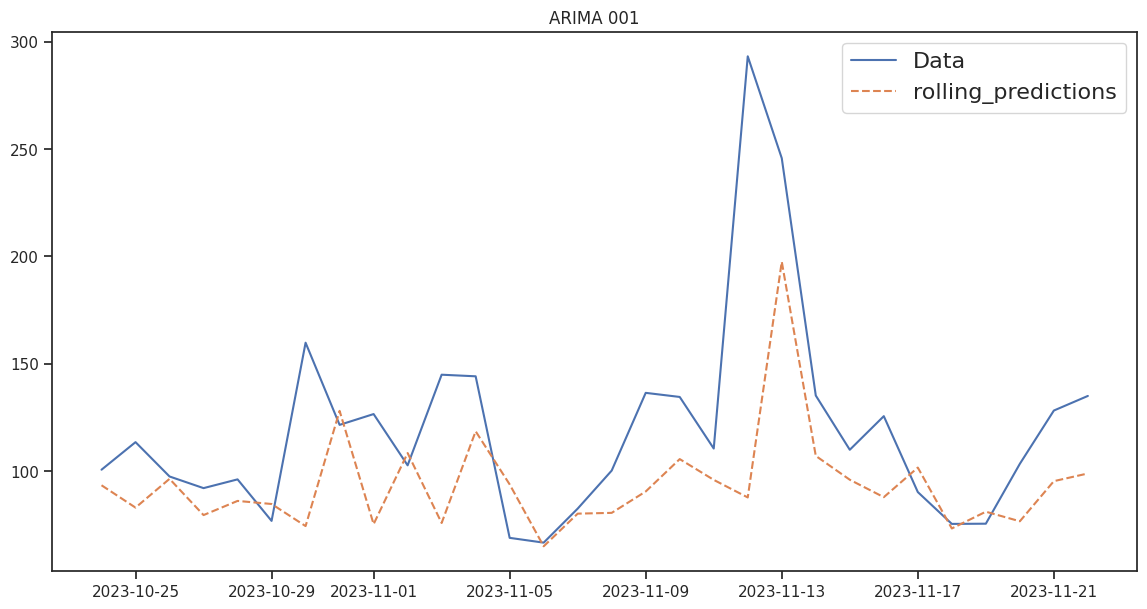

In [98]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions, '--')
plt.legend(('Data', 'rolling_predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Shifted -1 predictions ARIMA 001')

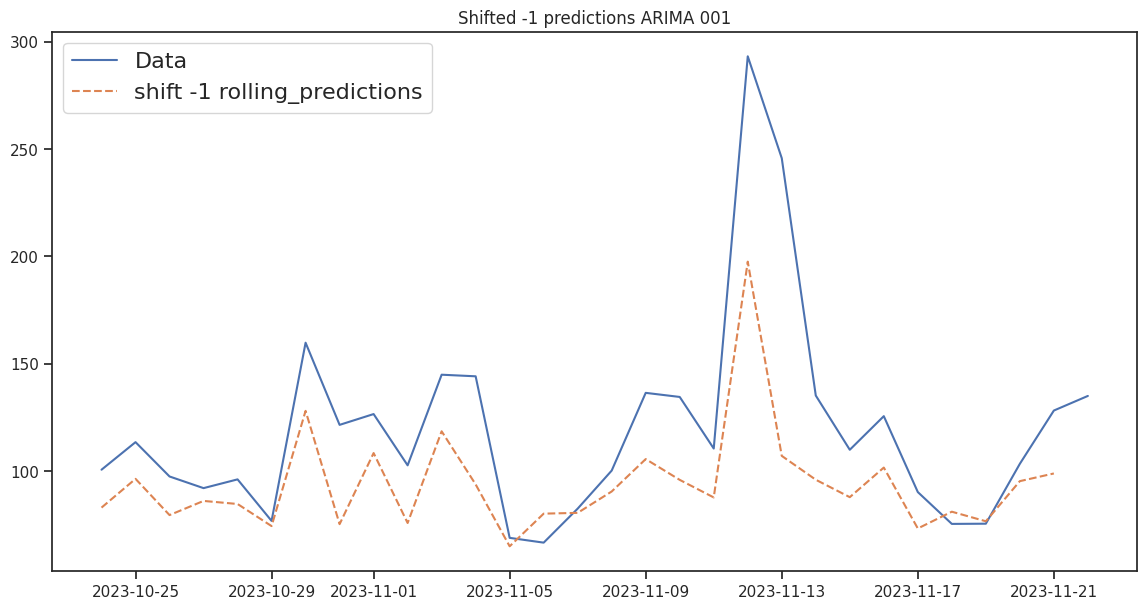

In [99]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(rolling_predictions.shift(-1) , '--')
plt.legend(('Data', 'shift -1 rolling_predictions'), fontsize=16)
plt.title("Shifted -1 predictions ARIMA " + str(p) + str(d) + str(q))

In [100]:
train_end = datetime(2023, 11, 18) # 4 days
test_end = datetime(2023, 11, 22)

train_data = velachery_daily_aqi_filtered[:train_end]['AQI']
test_data = velachery_daily_aqi_filtered[train_end + timedelta(days=1):test_end]['AQI']

p, d, q = (1, 0, 1)
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()
print("Model summary ", model_fit.summary())

Model summary                                 SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                 1052
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -5129.828
Date:                Wed, 26 Feb 2025   AIC                          10267.656
Time:                        11:55:24   BIC                          10287.490
Sample:                    01-01-2021   HQIC                         10275.176
                         - 11-18-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.8784      4.498     17.758      0.000      71.062      88.695
ar.L1          0.6929      0.018     37.841      0.000       0.657       0.729
ma.L1         -0.1182      0.021     

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [101]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
pred_start_date, pred_end_date

(Timestamp('2023-11-19 00:00:00'), Timestamp('2023-11-22 00:00:00'))

In [102]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions
residuals

Timestamp
2023-11-19    -2.907743
2023-11-20    24.539520
2023-11-21    49.032251
2023-11-22    55.618766
dtype: float64

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'ARIMA 101')

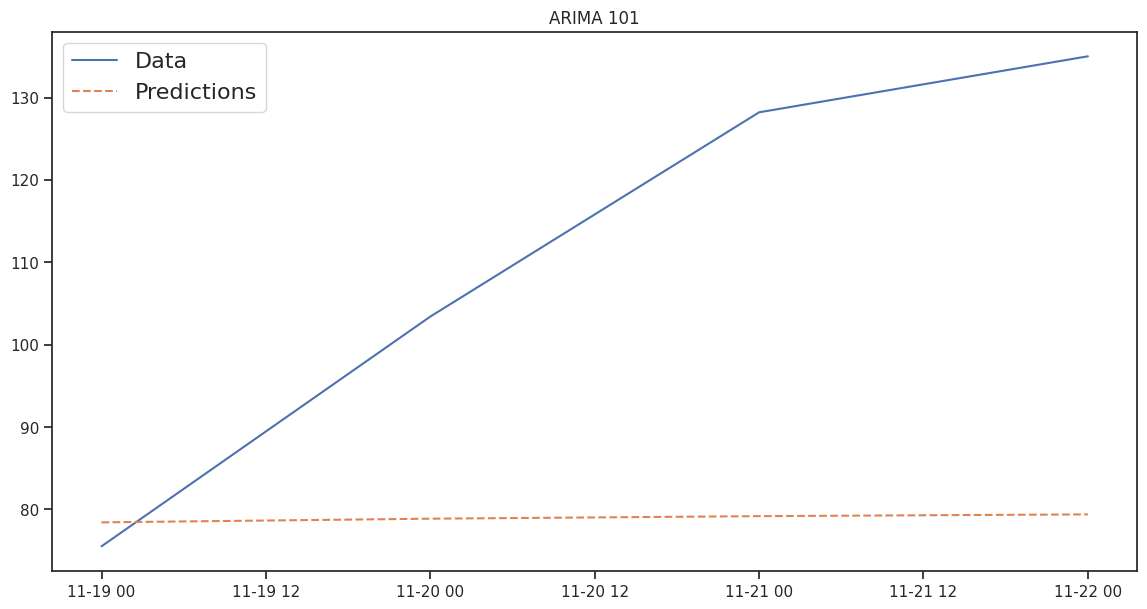

In [103]:
plt.figure(figsize=(14, 7))
plt.plot(test_data)
plt.plot(predictions, '--')
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title("ARIMA " + str(p) + str(d) + str(q))

In [104]:
model_fit.aic 
model_fit.aicc

np.float64(10267.656487304148)

np.float64(10267.694691697654)

In [105]:
model_fit.bic

np.float64(10287.490280877339)

In [106]:
model_fit.params

const       79.878426
ar.L1        0.692915
ma.L1       -0.118190
sigma2    1006.432207
dtype: float64

In [107]:
model_fit.seasonalarparams
model_fit.seasonalmaparams

array([], dtype=float64)

array([], dtype=float64)

In [108]:
#rf to calculate aqi

In [109]:
velachery_daily_aqi_rf = velachery_daily_aqi_indexed.copy()

In [110]:
velachery_daily_aqi_rf 

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NH3 (µg/m³),SO2 (µg/m³),Ozone (µg/m³),Benzene (µg/m³),Toluene (µg/m³),O Xylene (µg/m³),...,CO (µg/m³),BP (hPa),PM2.5_SubIndex,PM10_SubIndex,CO_SubIndex,Ozone_SubIndex,SO2_SubIndex,NOx_SubIndex,Checks,AQI
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01,39.075833,16.530000,0.388750,8.981667,17.990000,24.869167,28.570417,0.000000,0.000000,0.15,...,475.833333,1339.486134,66.668056,16.530000,23.791667,28.570417,31.086458,22.020479,6.0,66.668056
2021-01-02,37.730417,16.530000,0.507083,15.150833,17.990000,24.732500,20.977917,0.000000,0.000000,0.15,...,536.250000,1339.486134,62.884028,16.530000,26.812500,20.977917,30.915625,36.796104,6.0,63.033521
2021-01-03,32.687083,16.530000,0.367083,9.422083,17.990000,23.817083,11.626250,0.000000,0.000000,0.15,...,520.833333,1333.271107,54.826389,16.530000,26.041667,11.626250,29.771354,23.004542,6.0,55.588368
2021-01-04,42.684583,16.530000,1.086667,10.913750,17.990000,24.811250,14.289583,0.000000,0.000000,0.15,...,589.166667,1332.841699,80.863729,16.530000,29.458333,14.289583,31.014063,28.204896,6.0,84.455437
2021-01-05,10.970000,16.530000,11.550417,20.610417,17.990000,24.661250,7.120000,0.000000,0.000000,0.15,...,585.416667,1333.025572,18.283333,16.530000,29.270833,7.120000,30.826563,73.614971,6.0,76.759860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,24.060833,72.045833,4.751215,32.255069,10.628056,11.113438,16.562118,0.500069,1.000000,0.15,...,736.770833,1350.583339,40.101389,72.045833,36.291667,16.562118,13.891797,85.155753,6.0,90.562616
2023-12-28,21.666285,63.206806,2.231389,26.474618,7.760937,11.092326,16.854410,0.501042,1.002326,0.15,...,977.638889,1349.173273,36.110475,63.206806,48.881944,16.854410,13.865408,67.225479,6.0,78.547802
2023-12-29,20.454618,56.077813,1.849549,22.582465,8.269444,11.080556,16.644583,0.499514,0.999479,0.15,...,960.902778,1349.320483,34.091030,56.077813,47.080295,16.644583,13.850694,57.414120,6.0,69.226000


In [111]:
velachery_daily_aqi_rf.columns

Index(['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
       'NH3 (µg/m³)', 'SO2 (µg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)',
       'Toluene (µg/m³)', 'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)',
       'MP-Xylene (µg/m³)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)',
       'VWS (m/s)', 'station', 'hour', 'day', 'month', 'year', 'Wind Impact',
       'NOx (µg/m³)', 'CO (µg/m³)', 'BP (hPa)', 'PM2.5_SubIndex',
       'PM10_SubIndex', 'CO_SubIndex', 'Ozone_SubIndex', 'SO2_SubIndex',
       'NOx_SubIndex', 'Checks', 'AQI'],
      dtype='object')

In [112]:
velachery_daily_aqi_rf = velachery_daily_aqi_rf[['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (µg/m³)', 'CO (µg/m³)', 'Ozone (µg/m³)', 'AQI']]
velachery_daily_aqi_rf

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),CO (µg/m³),Ozone (µg/m³),AQI
Timestamp,,,,,,,,
2021-01-01,39.075833,16.530000,0.388750,8.981667,17.616383,475.833333,28.570417,66.668056
2021-01-02,37.730417,16.530000,0.507083,15.150833,29.436883,536.250000,20.977917,63.033521
2021-01-03,32.687083,16.530000,0.367083,9.422083,18.403633,520.833333,11.626250,55.588368
2021-01-04,42.684583,16.530000,1.086667,10.913750,22.563917,589.166667,14.289583,84.455437
2021-01-05,10.970000,16.530000,11.550417,20.610417,60.459233,585.416667,7.120000,76.759860
...,...,...,...,...,...,...,...,...
2023-12-27,24.060833,72.045833,4.751215,32.255069,69.572272,736.770833,16.562118,90.562616
2023-12-28,21.666285,63.206806,2.231389,26.474618,53.966706,977.638889,16.854410,78.547802
2023-12-29,20.454618,56.077813,1.849549,22.582465,45.932774,960.902778,16.644583,69.226000


In [113]:
train_end = pd.Timestamp('2023-11-23')
test_end = pd.Timestamp('2023-12-01')

train_data = velachery_daily_aqi_rf[:train_end]
test_data =  velachery_daily_aqi_rf[train_end + timedelta(days=1):test_end]

In [114]:

X_train_data = train_data.drop(['AQI'], axis=1)
y_train_data = train_data['AQI'].values

In [115]:
X_train_data

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),CO (µg/m³),Ozone (µg/m³)
Timestamp,,,,,,,
2021-01-01,39.075833,16.530000,0.388750,8.981667,17.616383,475.833333,28.570417
2021-01-02,37.730417,16.530000,0.507083,15.150833,29.436883,536.250000,20.977917
2021-01-03,32.687083,16.530000,0.367083,9.422083,18.403633,520.833333,11.626250
2021-01-04,42.684583,16.530000,1.086667,10.913750,22.563917,589.166667,14.289583
2021-01-05,10.970000,16.530000,11.550417,20.610417,60.459233,585.416667,7.120000
...,...,...,...,...,...,...,...
2023-11-19,16.212292,47.749618,5.164792,25.315833,57.303967,873.923611,14.275729
2023-11-20,20.006563,48.573715,7.774340,37.542118,85.260089,960.347222,18.073194
2023-11-21,16.650729,43.038993,12.329583,45.922535,109.515157,985.000000,22.223438


In [116]:

y_train_data

array([ 66.66805556,  63.03352083,  55.58836806, ..., 128.21485729,
       135.01504792, 126.88129722])

In [117]:

test_data

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),CO (µg/m³),Ozone (µg/m³),AQI
Timestamp,,,,,,,,
2023-11-24,14.078924,40.100764,9.395590,22.453507,59.875911,936.631944,12.776354,78.478428
2023-11-25,22.742535,52.184896,6.023333,26.122812,60.435538,934.027778,16.309375,81.507082
2023-11-26,27.777014,65.405764,2.139201,17.887431,37.648958,822.361111,34.994340,74.524353
2023-11-27,20.182500,46.883194,8.171910,30.531042,72.761287,1036.458333,17.613889,94.927039
2023-11-28,19.068819,41.648056,4.495556,22.877986,51.461932,855.520833,20.009757,69.124752
2023-11-29,14.489097,35.540174,9.961736,45.453333,104.181244,850.486111,16.215764,121.642585
2023-11-30,13.853090,33.887292,5.257708,31.137986,68.421817,1135.659722,16.668160,89.776032
2023-12-01,21.797951,58.143819,9.437500,44.128819,100.704876,899.930556,51.883889,138.272673


In [118]:

X_test_data = test_data.drop(['AQI'], axis=1)
y_test_data = test_data['AQI'].values

In [119]:

X_test_data

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (µg/m³),CO (µg/m³),Ozone (µg/m³)
Timestamp,,,,,,,
2023-11-24,14.078924,40.100764,9.395590,22.453507,59.875911,936.631944,12.776354
2023-11-25,22.742535,52.184896,6.023333,26.122812,60.435538,934.027778,16.309375
2023-11-26,27.777014,65.405764,2.139201,17.887431,37.648958,822.361111,34.994340
2023-11-27,20.182500,46.883194,8.171910,30.531042,72.761287,1036.458333,17.613889
2023-11-28,19.068819,41.648056,4.495556,22.877986,51.461932,855.520833,20.009757
2023-11-29,14.489097,35.540174,9.961736,45.453333,104.181244,850.486111,16.215764
2023-11-30,13.853090,33.887292,5.257708,31.137986,68.421817,1135.659722,16.668160
2023-12-01,21.797951,58.143819,9.437500,44.128819,100.704876,899.930556,51.883889


In [120]:

y_test_data

array([ 78.47842847,  81.50708229,  74.52435278,  94.92703854,
        69.12475243, 121.64258542,  89.77603229, 138.27267292])

In [121]:

from sklearn.ensemble import RandomForestRegressor

In [122]:

rf = RandomForestRegressor()
RandomForestRegressor?

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of decision tree
regressors on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is use

In [123]:

rf.fit(X_train_data, y_train_data)

RandomForestRegressor()

In [124]:
pred = rf.predict(X_test_data)

<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Random forest model')

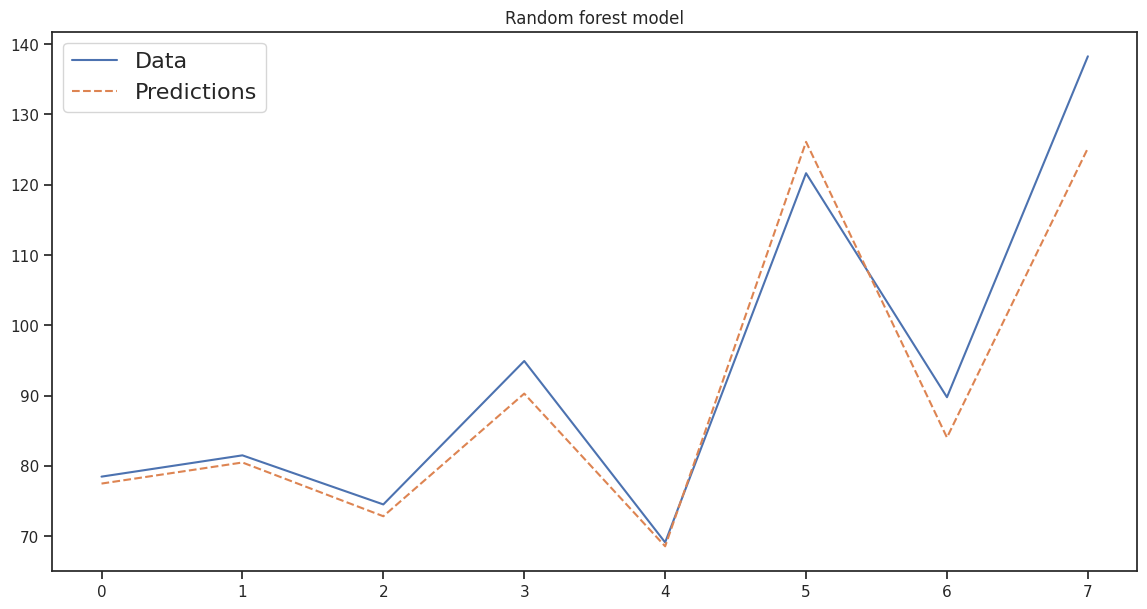

In [125]:
plt.figure(figsize=(14, 7))
plt.plot(y_test_data)
plt.plot(pred, '--')
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title("Random forest model")

In [126]:
#using Neural Network to calculate AQI